In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)



In [27]:
y_hat = tf.constant(36)     #-- Define y_hat constant set to 36
y= tf.constant(39)          #-- Define y. Set to 39

loss = (y-y_hat)**2         #-- Calculate the loss
tf.print(loss)              #-- print the loss

9


In [29]:
x = tf.constant(4, shape=(1,1), dtype =tf.float32)
tf.print(x)

x = tf.constant([[1,2,3], [4,5,6]])
tf.print(x)

x = tf.ones((3,3))
tf.print(x)

x = tf.zeros((3,3))
tf.print(x)

x = tf.eye(3)
tf.print(x)



[[4]]
[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [30]:
x = tf.constant([1,2,3])
y = tf.constant([9,8,7])

z = x + y
tf.print(z)

z = x - y
tf.print(z)

z = x / y
tf.print(z)

z = x * y
tf.print(z)

z = tf.tensordot(x,y,axes=1)
tf.print(z)

z = x ** 5
tf.print(z)

x = tf.random.normal((2,3))
y = tf.random.normal((3,4))

z = tf.matmul(x,y)
tf.print(z)


[10 10 10]
[-8 -6 -4]
[0.1111111111111111 0.25 0.42857142857142855]
[9 16 21]
46
[1 32 243]
[[-0.541303515 1.9507544 -1.66218197 4.53199387]
 [1.78214574 0.718164206 0.93665427 -2.16695142]]


In [31]:
x = tf.constant([0,1,1,2,3,1,2,3])
print(x[:])
print(x[1:])
print(x[1:3])
print(x[::2])
print(x[::-1])

indices = tf.constant([0,3])
x_ind = tf.gather(x, indices)
print(x_ind)

x = tf.constant([[1,2], [3,4], [5,6]])
print(x[0,:])
print(x[0:2, :])


tf.Tensor([0 1 1 2 3 1 2 3], shape=(8,), dtype=int32)
tf.Tensor([1 1 2 3 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([0 1 3 2], shape=(4,), dtype=int32)
tf.Tensor([3 2 1 3 2 1 1 0], shape=(8,), dtype=int32)
tf.Tensor([0 2], shape=(2,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [7]:
x = tf.range(9)
print(x)

x= tf.reshape(x,(3,3))
print(x)

x = tf.transpose(x, perm=[1,0])
print(x)        

tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)
tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[0 3 6]
 [1 4 7]
 [2 5 8]], shape=(3, 3), dtype=int32)


In [16]:
def linear_function():
    W = tf.random.uniform(
        (4,3),
        minval=0,
        maxval=100,
        dtype=tf.dtypes.int32,
        seed=None,
        name=None
    )
    # print("This is variable W: ")
    # print(W)

    X = tf.random.uniform(
        (3,1),
        minval=0,
        maxval=100,
        dtype=tf.dtypes.int32,
        seed=None,
        name=None
    )
    # print("This is variable X: ")
    # print(X)

    b = tf.random.uniform(
        (4,1),
        minval=0,
        maxval=100,
        dtype=tf.dtypes.int32,
        seed=None,
        name=None
    )

    # print("This is variable b: ")
    # print(b)

    mulWX = tf.matmul(W,X) 
    final = tf.add(mulWX, b)
    return final

    


In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11490434/11490434 [==============================] - 6s 0us/step
(60000, 28, 28)


In [20]:
x_train = x_train.reshape(-1, 28 *28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [23]:
model = keras.Sequential(
    [
        layers.Dense(2, activation='relu'),
        layers.Dense(3, activation='relu'),
        layers.Dense(4),
    ]
)

In [24]:
model.layers

In [26]:
#creating our layers
model = keras.Sequential(
    [
        layers.Dense(200, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(10),
    ]
)

#-- telling keras how to configure the training part of our network. For example
#-- what loss do you want to use for training, etc

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr = 0.00001),
    metrics=['accuracy'],
)

#-- fit train our model similar to sklearn's fit
model.fit(x_train, y_train, batch_size=32, epochs = 1, verbose=2)
#-- evaluate using the test data
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 - 5s - loss: 1.4706 - accuracy: 0.6730 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.7904 - accuracy: 0.8448 - 571ms/epoch - 2ms/step


[0.790351390838623, 0.8447999954223633]

In [32]:
#-- The reason the fully connected layer was of size 10 was in order to print out a shape of [None, 10]
#-- cross entropy is great for multi-classification models and in this case we have 0-9
#-- 

In [42]:
#creating our layers
model = keras.Sequential(
    [
        layers.Dense(200, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(10),
    ]
)

#-- telling keras how to configure the training part of our network. For example
#-- what loss do you want to use for training, etc

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr = 0.00001),
    metrics=['accuracy'],
)

#-- fit train our model similar to sklearn's fit
model.fit(x_train, y_train, batch_size=32, epochs = 10, verbose=2)
#-- evaluate using the test data
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 4s - loss: 1.5103 - accuracy: 0.6433 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.6095 - accuracy: 0.8589 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.4303 - accuracy: 0.8888 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.3637 - accuracy: 0.9021 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.3265 - accuracy: 0.9103 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.3007 - accuracy: 0.9168 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.2810 - accuracy: 0.9218 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2649 - accuracy: 0.9264 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.2512 - accuracy: 0.9304 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.2391 - accuracy: 0.9337 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.2302 - accuracy: 0.9348 - 521ms/epoch - 2ms/step


[0.23022285103797913, 0.9348000288009644]

In [ ]:
#-- As we can tell here as we raise the epochs we realize that each iteration the accuracy goes up 
#-- In this scenario I ran it till 10 epochs but we can clearly see if we ran 50 or 100 we would have over 0.95

In [44]:
inputs = keras.Input(shape=(28 * 28))
x = layers.Dense(512, activation="relu")(inputs)            #-- pass in inputs
x = layers.Dense(256, activation="relu")(x)                 #-- pass in previous layer's output
outputs = layers.Dense(10, activation="softmax")(x)         #-- pass in previous layer's output
model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(lr = 0.001),
    metrics=['accuracy'],

)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)


Epoch 1/5


C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 - 7s - loss: 0.1857 - accuracy: 0.9438 - 7s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 7s - loss: 0.0789 - accuracy: 0.9750 - 7s/epoch - 4ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0554 - accuracy: 0.9821 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 7s - loss: 0.0408 - accuracy: 0.9866 - 7s/epoch - 4ms/step
Epoch 5/5
1875/1875 - 7s - loss: 0.0321 - accuracy: 0.9897 - 7s/epoch - 4ms/step
313/313 - 1s - loss: 0.0831 - accuracy: 0.9795 - 686ms/epoch - 2ms/step


[0.08305422216653824, 0.9794999957084656]

In [46]:
#-- There is less loss in functional and greaterr accuracy
#-- The accuracy was 97.9% and you could prob raise this score by raising the epochs count

In [47]:
#--------------------------BELOW IS THE TUTORIAL ON HOW TO WORK WITH CSV

In [49]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [50]:

#-- Here we will read the file from a online storage and assing the column names
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [52]:
#-- Main point here is to decide the age 
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [54]:
#-- place in numpy array
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [55]:
#-- Create a regression model, sequential is great for one input
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [56]:
#-- Here we train the model with 10 epochs 
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 2s 10ms/step - loss: 64.2275
Epoch 2/10
104/104 [==============================] - 1s 11ms/step - loss: 11.8205
Epoch 3/10
104/104 [==============================] - 1s 11ms/step - loss: 8.4791
Epoch 4/10
104/104 [==============================] - 1s 11ms/step - loss: 7.9715
Epoch 5/10
104/104 [==============================] - 1s 11ms/step - loss: 7.5173
Epoch 6/10
104/104 [==============================] - 1s 11ms/step - loss: 7.1678
Epoch 7/10
104/104 [==============================] - 1s 11ms/step - loss: 6.8925
Epoch 8/10
104/104 [==============================] - 1s 10ms/step - loss: 6.7000
Epoch 9/10
104/104 [==============================] - 1s 10ms/step - loss: 6.5638
Epoch 10/10
104/104 [==============================] - 1s 10ms/step - loss: 6.4562


In [57]:
#-- By normalizing the data we initially calculate the mean and variance of each column
normalize = layers.Normalization()
normalize.adapt(abalone_features)

In [58]:
#-- Normalizing above has created another layer so we fit the data
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 11ms/step - loss: 92.5313
Epoch 2/10
104/104 [==============================] - 1s 11ms/step - loss: 53.3551
Epoch 3/10
104/104 [==============================] - 1s 11ms/step - loss: 16.2490
Epoch 4/10
104/104 [==============================] - 1s 11ms/step - loss: 5.8163
Epoch 5/10
104/104 [==============================] - 1s 11ms/step - loss: 5.0189
Epoch 6/10
104/104 [==============================] - 1s 11ms/step - loss: 4.9889
Epoch 7/10
104/104 [==============================] - 1s 11ms/step - loss: 4.9502
Epoch 8/10
104/104 [==============================] - 1s 10ms/step - loss: 4.9540
Epoch 9/10
104/104 [==============================] - 1s 11ms/step - loss: 4.9166
Epoch 10/10
104/104 [==============================] - 1s 10ms/step - loss: 4.9295


In [59]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [60]:
#-- Here we will pop the survived because that is what we want to know
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [61]:
#-- This will create a pre defined tensor to use later w/ float variables 
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [62]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [63]:
#-- 1 is put into the equation
#-- 2 is pit into the next function
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [64]:
#-- Built preprocessing model w/ type of variables

inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [65]:
#-- Here concatentaion takes places 
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [66]:
#-- This we will concatenate later
preprocessed_inputs = [all_numeric_inputs]

In [67]:
#-- Here we will create one hot vector for each input
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

In [68]:
#-- This will build a model but requires further libraries to print
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
#-- Here is a dictionary of tensors in order to specify bc library doesn't know what to do with it 
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [71]:
#-- This brings out the numeric and string one hots
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [72]:
#-- Time to build model
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [73]:
#-- Pass in dictionaries after training the model
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 0.6334
Epoch 2/10
20/20 [==============================] - 2s 96ms/step - loss: 0.5376
Epoch 3/10
20/20 [==============================] - 1s 55ms/step - loss: 0.4872
Epoch 4/10
20/20 [==============================] - 2s 72ms/step - loss: 0.4593
Epoch 5/10
20/20 [==============================] - 2s 79ms/step - loss: 0.4438
Epoch 6/10
20/20 [==============================] - 2s 66ms/step - loss: 0.4337
Epoch 7/10
20/20 [==============================] - 2s 84ms/step - loss: 0.4278
Epoch 8/10
20/20 [==============================] - 2s 80ms/step - loss: 0.4253
Epoch 9/10
20/20 [==============================] - 2s 79ms/step - loss: 0.4247
Epoch 10/10
20/20 [==============================] - 1s 59ms/step - loss: 0.4222


In [74]:
#-- reload it to run the preprocessing because it belongs to the model
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test\assets


In [75]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.89]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.89]], shape=(1, 1), dtype=float32)


In [76]:
#--  create slices with index saved of each feature 
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [77]:
#-- This will print the first example
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [78]:
#-- This line does what was done in the last two boxes above
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [79]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break
#-- This will iterate just the same

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [80]:
#-- create a dataset pairs
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [81]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)
#-- Shuffle data around

In [83]:
#-- Pass whole dataset
titanic_model.fit(titanic_batches, epochs=5)


Epoch 1/5
20/20 [==============================] - 1s 2ms/step - loss: 0.4237
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4213
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4203


In [84]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")


30874/30874 [==============================] - 0s 1us/step


In [85]:
#-- This is creating a tf dataset
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

In [86]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'male' b'male' b'male']
age                 : [15. 21. 21. 26. 28.]
n_siblings_spouses  : [1 0 0 0 0]
parch               : [0 0 0 0 0]
fare                : [14.454  7.796  7.775  7.775  8.05 ]
class               : [b'Third' b'Third' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'y' b'y' b'y' b'y']

label               : [1 1 0 0 0]


In [87]:
#-- running the code above twice will return different results 
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'female' b'male']
age                 : [24. 62. 35. 28. 31.]
n_siblings_spouses  : [0 0 0 0 1]
parch               : [0 0 0 2 0]
fare                : [  7.896  10.5   512.329  22.358  57.   ]
class               : [b'Third' b'Second' b'First' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'B' b'unknown' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg' b'Cherbourg' b'Southampton']
alone               : [b'y' b'y' b'y' b'n' b'n']

label               : [0 1 1 1 1]


In [88]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

405373/405373 [==============================] - 0s 1us/step


In [89]:
#-- Set compression type in order to better read file
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [275.15 274.38 282.23 290.57 265.04]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [ 1 90 90 90 75]
weather_main        : [b'Clear' b'Haze' b'Clouds' b'Clouds' b'Mist']
weather_description : [b'sky is clear' b'haze' b'overcast clouds' b'overcast clouds' b'mist']
date_time           : [b'2013-04-16 22:00:00' b'2012-12-01 18:00:00' b'2012-10-14 05:00:00'
 b'2013-06-30 09:00:00' b'2013-01-06 22:00:00']

label               : [2142 4788  505 3245 1384]


In [93]:
#-- Caching-- This can be the bottle neck of small dataset
%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

CPU times: total: 0 ns
Wall time: 0 ns
...............................................................................................


In [94]:
#-- Here we will shuffle data 
%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

CPU times: total: 0 ns
Wall time: 0 ns
...............................................................................................


In [95]:
#-- snapshot is only for temp storage
%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

CPU times: total: 0 ns
Wall time: 0 ns
Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
...............................................................................................


In [96]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

160313983/160313983 [==============================] - 75s 0us/step


In [97]:
#-- downloading many files
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts\\AGENCY.csv',
 'fonts\\ARIAL.csv',
 'fonts\\BAITI.csv',
 'fonts\\BANKGOTHIC.csv',
 'fonts\\BASKERVILLE.csv',
 'fonts\\BAUHAUS.csv',
 'fonts\\BELL.csv',
 'fonts\\BERLIN.csv',
 'fonts\\BERNARD.csv',
 'fonts\\BITSTREAMVERA.csv']

In [98]:
len(font_csvs)

153

In [99]:
#-- function sees how many files are read in parallel and how many are interleaved
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [100]:
#-- Here images are flattened to a single row
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'BRADLEY' b'PERPETUA' b'BODONI' b'BAITI' b'PERPETUA' b'PRISTINA'
 b'TECHNIC' b'E13B' b'MONOSPAC821' b'TW']
fontVariant         : [b'BRADLEY HAND ITC' b'PERPETUA TITLING MT' b'BODONI MT POSTER COMPRESSED'
 b'MONGOLIAN BAITI' b'PERPETUA TITLING MT' b'PRISTINA' b'TECHNICLITE'
 b'scanned' b'MONOSPAC821 BT' b'TW CEN MT CONDENSED EXTRA BOLD']
m_label             : [   44   222    57  8250   251   235 61639    48   321   711]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 1 0 1 1 0 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [71 36 33 46 21 37 34  0 39 36]
m_left              : [20 23 21 24 31 21 24  0 19 20]
originalH           : [14 48 49 32 64 42 57 16 46 10]
originalW           : [11 40 16 20 56 19 32  8 37 22]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1   1   1   1   1   0   1 255]
r0c

In [101]:
#-- This parses the images into its own column 
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [102]:
#-- Then you have to apply the function above to each batch
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 43856 (\N{LATIN SMALL LETTER UI}) missing from current font.
  func(*args, **kwargs)
C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 43856 (\N{LATIN SMALL LETTER UI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


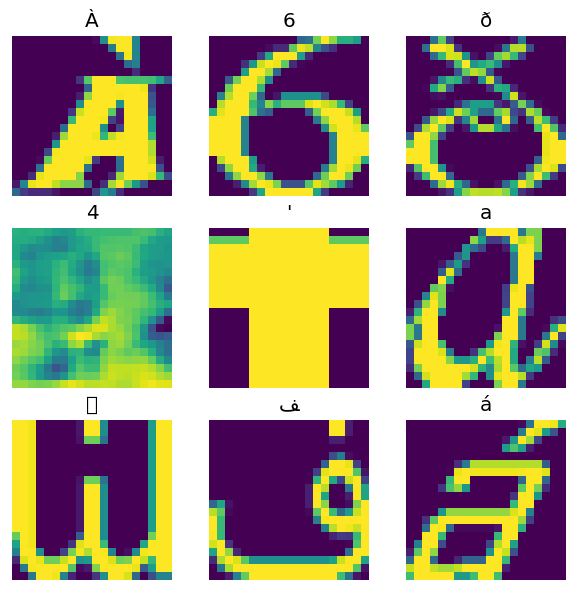

In [103]:
#-- Plot the data
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

In [104]:
#-- Decodes string into a list of columns
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [105]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [106]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [107]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [108]:
#-- description of storage
features = tf.io.decode_csv(lines, record_defaults=titanic_types) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [109]:
#-- Does the same as decode_csv
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [110]:
#-- This is the same as above
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [111]:
#-- Figure out the dataset types in order to parse
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [112]:
#-- By counting the columns we can figure out the columns
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [113]:
font_csvs[0]

'fonts\\AGENCY.csv'

In [114]:
#-- Wehn passing a list of files AGENCY.csv is read first
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [115]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [116]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

In [117]:
#-- Shuffle file name
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts\\SERIF.csv'
     b'fonts\\VINER.csv'
     b'fonts\\AGENCY.csv'
     b'fonts\\MAGNETO.csv'
     b'fonts\\PANROMAN.csv'
    ...

Epoch 2:
     b'fonts\\BANKGOTHIC.csv'
     b'fonts\\SIMPLEX.csv'
     b'fonts\\CALIFORNIAN.csv'
     b'fonts\\MONOTXT.csv'
     b'fonts\\FRANKLIN.csv'
    ...


In [118]:
#-- Create map function to create child dataset of each column
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)


In [119]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [120]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

C:\Users\mauri\AppData\Local\Temp\ipykernel_5836\998453860.py:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  fonts_dict['character'].append(chr(row[2].numpy()))


,font_name,character
0,EUROROMAN,
1,COUNTRYBLUEPRINT,
2,PMINGLIU-EXTB,™
3,EUROROMAN,
4,COUNTRYBLUEPRINT,
5,PMINGLIU-EXTB,›
6,EUROROMAN,
7,COUNTRYBLUEPRINT,
8,PMINGLIU-EXTB,‹
9,EUROROMAN,


In [121]:
#-- Cacching helps load faster all the csv files

BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [122]:
%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

CPU times: total: 0 ns
Wall time: 0 ns
....................


In [123]:
#-- This will run in less than a sec
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [124]:
%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

CPU times: total: 0 ns
Wall time: 0 ns
....................
